In [1]:
cd -q ~/projects/Project_TaskSCCA/

In [2]:
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from src.data_cleaning import clean_confound, select_mad_percentile
from src.visualize import plot_mad_results

sns.set_style({"font.sans-serif": ["Arial"]})
sns.set_context('paper', font_scale=1.5)

In [3]:
path_master = 'data/interim/df_master_p178.pkl'
df_master = pd.read_pickle(path_master)

connectome_labels = [c for c in df_master.columns if re.search("\d* vs \d*", c)]
COG_labels = df_master.columns[5:18]
confound_labels = ['AGE', 'GENDER', 'MeanFD_Jenkinson']

In [4]:
X = df_master.loc[:, connectome_labels].apply(pd.to_numeric, errors='coerce')
Y = df_master.loc[:, COG_labels].apply(pd.to_numeric, errors='coerce')
confound = df_master.loc[:, confound_labels].apply(pd.to_numeric, errors='coerce')

X = X.values
Y = Y.values
confound = confound.values

# Dimension reduction on the functional connectivity

In [5]:
# select 95% of the edges

# fc_mad = mad(X)
# fc_mean = X.mean(axis=0)
# _, mask_95 = select_mad_percentile(fc_mean, fc_mad, 95)

# X_masked = X[:, mask_95]

# # clean and z score the data
# X_clean, Y_clean, confmat = clean_confound(X_masked, Y, confound)

# save the cleaned data and the mask for the late analysis and reconstructing niftis
# np.save('data/processed/X_clean', X_clean)
# np.save('data/processed/Y_clean', Y_clean)
# np.save('data/processed/X_mask', mask_95)
# np.save('data/processed/confound', confmat)

In [6]:
FC_reduction = plot_mad_results(X)

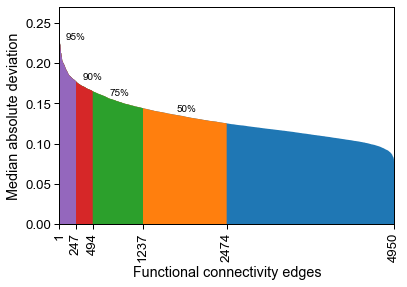

In [7]:
FC_reduction.plot_mad_distroubtion('mad_percentile')

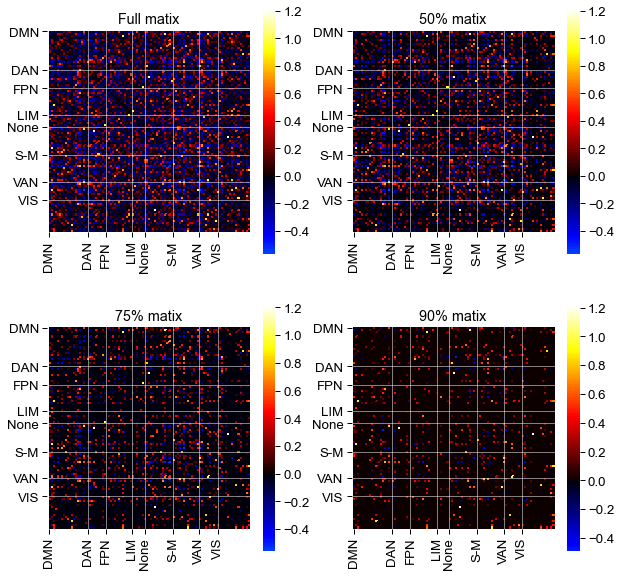

In [8]:
FC_reduction.plot_mad_reduction('references/scorr05_2level_names_100.csv',
                                'FC_mat'                               
                               )